In [ ]:
!pip install requirements.txt

In [18]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read our Excel file using pandas
df = pd.read_excel('/content/drive/MyDrive/freelancer/task 05/File_New.xlsx')
#convert all the words into lower case
df['Level '] = df['Level '].str.lower()
# some values in level are written with and without "-" so we need to remove "-" with a space to make sure that there are only 4 unique values
df['Level '] = df['Level '].str.replace('-', ' ')
df.head(5)

,SI,Important Programs,Code,Sub-Programs,Level,Scores
0,RA01,Business,5551.0,Executive Leadership program,first time,0.00000
1,RA01,Business,5552.0,English Startup,first time,1.33333
2,RA01,Business,5553.0,Startup space,first time,1.33333
3,RA01,Business,5555.0,Accounting Information,first time,2.13667
4,RA01,Social Sciences,7771.0,Idol Community,first time,2.53333


In [7]:
#lets create a pivot table of first time second time third time and the fourth time with their mean
#in pivot table value of a column can be added as a column. adding above mentioned columns are making things easier
df1 = df.pivot_table('Scores', ['SI'], 'Level ').reset_index()
df1 = df1.fillna(0)
df1

Level,SI,first time,fourth time,second time,third time
0,RA01,1.687777,2.532222,2.386666,1.571667
1,RA02,1.814666,2.737336,2.469584,1.825000
2,RA03,1.344666,0.566667,3.217143,3.518335
3,RA04,1.669443,3.388094,2.916666,2.472381
4,RA05,1.595000,1.820557,1.741667,3.071667
...,...,...,...,...,...
64,RA66,2.682220,1.394445,1.986665,2.944445
65,RA67,2.271211,1.870302,1.632820,1.903333
66,RA68,2.081998,2.371998,2.809049,1.061667
67,RA69,2.489998,2.187222,1.645000,1.372777


In [8]:
#create a new column called final_score to store the final score of all of four year
df1['final_score'] = df1.mean(axis=1)
print(df1)

Level     SI  first time  fourth time  second time  third time  final_score
0       RA01    1.687777     2.532222     2.386666    1.571667     2.044583
1       RA02    1.814666     2.737336     2.469584    1.825000     2.211646
2       RA03    1.344666     0.566667     3.217143    3.518335     2.161703
3       RA04    1.669443     3.388094     2.916666    2.472381     2.611646
4       RA05    1.595000     1.820557     1.741667    3.071667     2.057222
..       ...         ...          ...          ...         ...          ...
64      RA66    2.682220     1.394445     1.986665    2.944445     2.251944
65      RA67    2.271211     1.870302     1.632820    1.903333     1.919416
66      RA68    2.081998     2.371998     2.809049    1.061667     2.081178
67      RA69    2.489998     2.187222     1.645000    1.372777     1.923749
68      RA70    1.571667     2.219998     1.563333    2.361665     1.929166

[69 rows x 6 columns]


In [ ]:
#we predict the results only using first two years so lets remove the third and fouth columns
final_dataset = df1.drop(columns=['third time', 'fourth time'])
final_dataset

Level,SI,first time,second time,final_score
0,RA01,1.687777,2.386666,2.044583
1,RA02,1.814666,2.469584,2.211646
2,RA03,1.344666,3.217143,2.161703
3,RA04,1.669443,2.916666,2.611646
4,RA05,1.595000,1.741667,2.057222
...,...,...,...,...
64,RA66,2.682220,1.986665,2.251944
65,RA67,2.271211,1.632820,1.919416
66,RA68,2.081998,2.809049,2.081178
67,RA69,2.489998,1.645000,1.923749


In [ ]:
#lest create a linear regression machine learning model to get the output
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
#extact the feature values
features = ['first time']

X = final_dataset.loc[:, features].values
#extract the label values
y = final_dataset['final_score']

#define train and test dataset of X and y respectively
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

print(y_pred)

Coefficients: 
 [0.14434261]
Mean squared error: 0.02
Coefficient of determination: -0.07
[1.94326761 1.86224349 2.03901468 2.00600844 1.97627415 2.13049628
 1.97717244 1.86224349 2.06490027 2.05648028 2.02592776 1.9908044
 2.06490027 2.06794758]


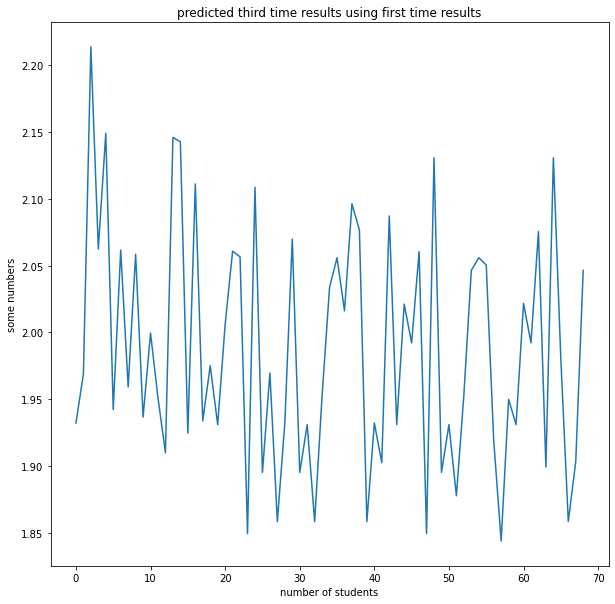

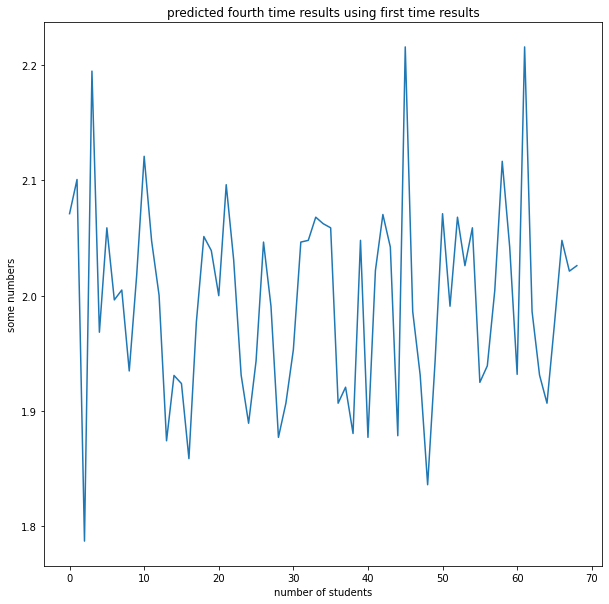

In [ ]:
new_feature1 = df1[['third time']]
new_feature2 = df1[['fourth time']]
new_pred1 = regr.predict(new_feature1)
new_pred2 = regr.predict(new_feature2)
#print(new_pred)

#plotting


plt.figure(figsize=(10, 10))
plt.plot(new_pred1)
plt.xlabel('number of students')
plt.ylabel('some numbers')
plt.title('predicted third time results using first time results')


plt.figure(figsize=(10, 10))
plt.plot(new_pred2)
plt.xlabel('number of students')
plt.ylabel('some numbers')
plt.title('predicted fourth time results using first time results')


plt.show()








In [ ]:
#lest create a linear regression machine learning model to get the output
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
#extact the feature values
features = ['second time']

X = final_dataset.loc[:, features].values
#extract the label values
y = final_dataset['final_score']

#define train and test dataset of X and y respectively
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)

# Create linear regression object
regr1 = linear_model.LinearRegression()

# Train the model using the training sets
regr1.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr1.predict(X_test)

# The coefficients
print('Coefficients: \n', regr1.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

print(y_pred)

Coefficients: 
 [0.1510986]
Mean squared error: 0.02
Coefficient of determination: -0.39
[1.98892509 1.97486031 2.10155826 2.11983429 2.07987365 1.85948406
 1.94792721 1.93743648 1.94394818 2.06961144 2.11729202 2.07162624
 1.94394818 1.85948406]


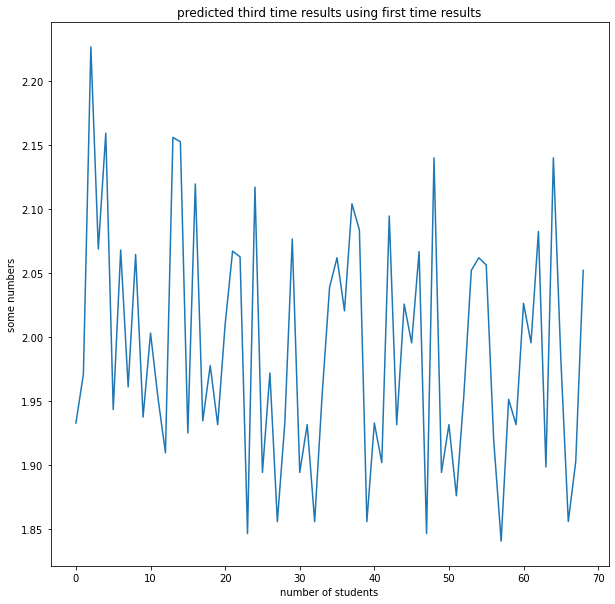

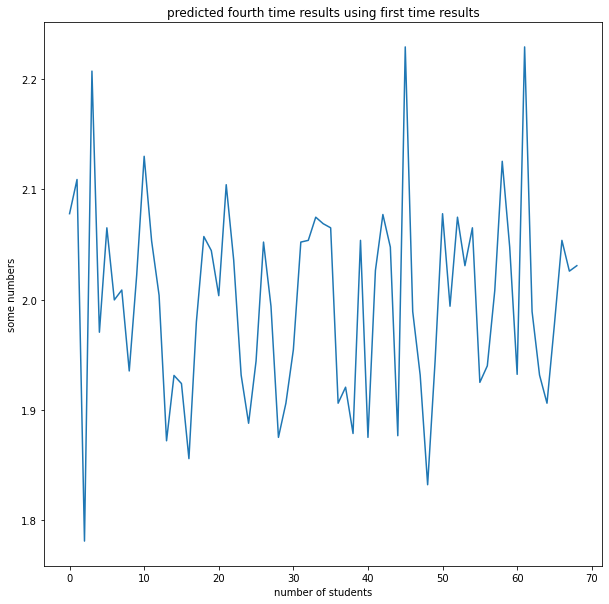

In [ ]:
new_feature3 = df1[['third time']]
new_feature4 = df1[['fourth time']]
new_pred3 = regr1.predict(new_feature3)
new_pred4 = regr1.predict(new_feature4)
#print(new_pred)

#plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(new_pred3)
plt.xlabel('number of students')
plt.ylabel('some numbers')
plt.title('predicted third time results using first time results')


plt.figure(figsize=(10, 10))
plt.plot(new_pred4)
plt.xlabel('number of students')
plt.ylabel('some numbers')
plt.title('predicted fourth time results using first time results')


plt.show()


In [ ]:
#lest create a linear regression machine learning model to get the output
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
#extact the feature values
features = ['first time']

X = final_dataset.loc[:, features].values
#extract the label values
y = final_dataset['final_score']

#define train and test dataset of X and y respectively
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)

# Create linear regression object
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regr2.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr2.predict(X_test)

# The coefficients
print('Coefficients: \n', regr2.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

print(y_pred)

Coefficients: 
 [0.14434261]
Mean squared error: 0.02
Coefficient of determination: -0.07
[1.94326761 1.86224349 2.03901468 2.00600844 1.97627415 2.13049628
 1.97717244 1.86224349 2.06490027 2.05648028 2.02592776 1.9908044
 2.06490027 2.06794758]


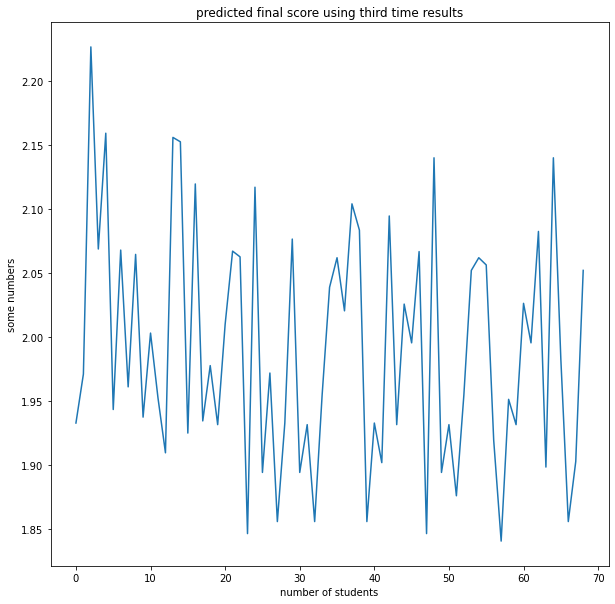

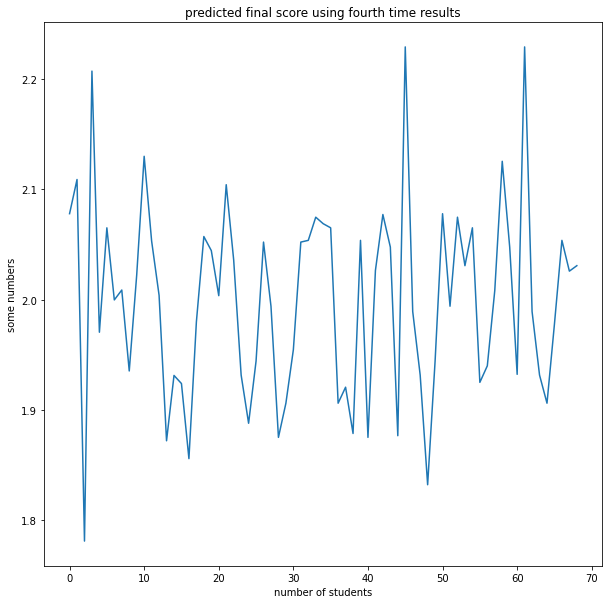

In [ ]:
new_feature3 = df1[['third time']]
new_feature4 = df1[['fourth time']]
new_pred3 = regr1.predict(new_feature3)
new_pred4 = regr1.predict(new_feature4)
#print(new_pred)

#plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(new_pred3)
plt.xlabel('number of students')
plt.ylabel('some numbers')
plt.title('predicted final score using third time results')


plt.figure(figsize=(10, 10))
plt.plot(new_pred4)
plt.xlabel('number of students')
plt.ylabel('some numbers')
plt.title('predicted final score using fourth time results')


plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

## Define variables for the for loop

kf = KFold(n_splits=10)
RMSE_sum=0
RMSE_length=10
X = final_dataset.loc[:, features].values
y = final_dataset['final_score']

for loop_number, (train, test) in enumerate(kf.split(X)):

    ## Get Training Matrix and Vector
new_feature = df1[['third time', 'fourth time']]

new_pred = lr_model.predict(new_feature)
print(new_pred)
    training_X_array = X[train]
    training_y_array = y[train]

    ## Get Testing Matrix Values

    X_test_array = X[test]
    y_actual_values = y[test]

    ## Fit the Linear Regression Model

    lr_model = LinearRegression().fit(training_X_array, training_y_array)

    ## Compute the predictions for the test data

    prediction = lr_model.predict(X_test_array)      
    prediction = np.array(prediction)   

    ## Calculate the RMSE

    RMSE_cross_fold = sqrt(mse(prediction, y_actual_values))

    ## Add each RMSE_cross_fold value to the sum

    RMSE_sum=RMSE_cross_fold+RMSE_sum

## Calculate the average and print    

RMSE_cross_fold_avg=RMSE_sum/RMSE_length

print('The Mean RMSE across all folds is',RMSE_cross_fold_avg)


The Mean RMSE across all folds is 0.17108098311391687


In [ ]:
new_feature

In [ ]:
print(x_axis)

53    RA54
68    RA70
Name: SI, dtype: object


In [ ]:
#lest create a support vector regression machine learning model to get the output
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
#split feature set from the data frame
features = ['first time']
#set above columns as the feature
X = final_dataset.loc[:, features].values
#set final_score column as the laber
y = final_dataset['final_score']

#add train_test_split to split train and test data
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)

# Create linear regression object
svr = SVR(kernel = 'rbf')

# Train the model using the training sets
svr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = svr.predict(X_test)



print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot output

Mean squared error: 0.03
Coefficient of determination: -0.59


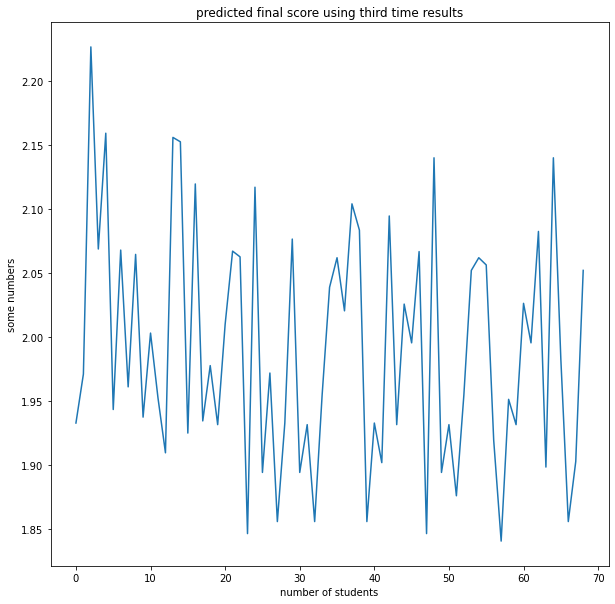

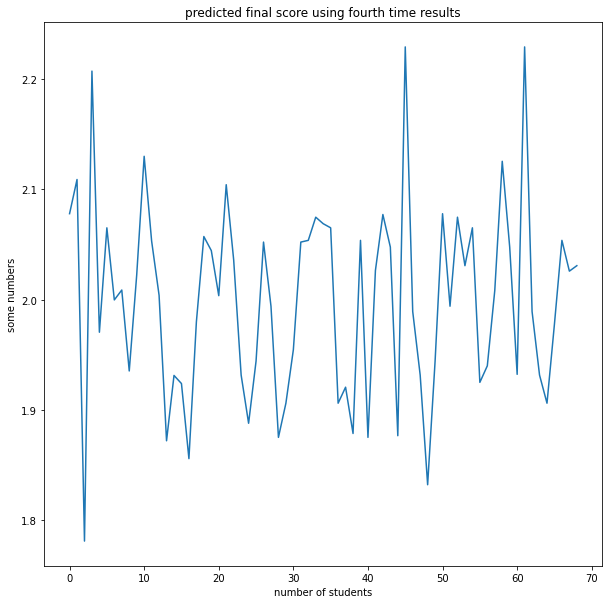

In [ ]:
new_feature5 = df1[['third time']]
new_feature6 = df1[['fourth time']]
new_pred5 = svr.predict(new_feature5)
new_pred6 = svr.predict(new_feature6)
#print(new_pred)

#plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(new_pred3)
plt.xlabel('number of students')
plt.ylabel('some numbers')
plt.title('predicted final score using third time results')


plt.figure(figsize=(10, 10))
plt.plot(new_pred4)
plt.xlabel('number of students')
plt.ylabel('some numbers')
plt.title('predicted final score using fourth time results')


plt.show()

In [ ]:
# lets find the cross validation
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

## Define variables for the for loop

kf = KFold(n_splits=10)
RMSE_sum=0
RMSE_length=10
X = final_dataset.loc[:, features].values
y = final_dataset['final_score']

for loop_number, (train, test) in enumerate(kf.split(X)):

    ## Get Training Matrix and Vector

    training_X_array = X[train]
    training_y_array = y[train]

    ## Get Testing Matrix Values

    X_test_array = X[test]
    y_actual_values = y[test]

    ## Fit the Linear Regression Model

    svr_model = SVR().fit(training_X_array, training_y_array)
#svr = SVR(kernel = 'rbf')
    ## Compute the predictions for the test data

    prediction = svr_model.predict(X_test_array)      
    prediction = np.array(prediction)   

    ## Calculate the RMSE

    RMSE_cross_fold = sqrt(mse(prediction, y_actual_values))

    ## Add each RMSE_cross_fold value to the sum

    RMSE_sum=RMSE_cross_fold+RMSE_sum

## Calculate the average and print    

RMSE_cross_fold_avg=RMSE_sum/RMSE_length

print('The Mean RMSE across all folds is',RMSE_cross_fold_avg)


The Mean RMSE across all folds is 0.18524374993524312


In [ ]:
#lets label the final_score before feed to the classifires
label = []

for num in final_dataset['final_score']:
  if num < 2.00:
    label.append(1)
  elif num >= 2.00 and num < 3.00:
    label.append(2)
  else:
    label.append(3)



In [ ]:
#add that array to a dataframe of final_dataset
final_dataset['label'] = pd.DataFrame(label)


In [ ]:
final_dataset

Level,SI,first time,second time,final_score,label
0,RA01,1.687777,2.386666,2.044583,2
1,RA02,1.814666,2.469584,2.211646,2
2,RA03,1.344666,3.217143,2.161703,2
3,RA04,1.669443,2.916666,2.611646,2
4,RA05,1.595000,1.741667,2.057222,2
...,...,...,...,...,...
64,RA66,2.682220,1.986665,2.251944,2
65,RA67,2.271211,1.632820,1.919416,1
66,RA68,2.081998,2.809049,2.081178,2
67,RA69,2.489998,1.645000,1.923749,1


In [ ]:
# import k nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
#split feature set from the data frame
features = ['first time']
#split the train and test data
X = final_dataset.loc[:, features].values
y = final_dataset['label']


X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)

# Create linear regression object
clf = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = clf.predict(X_test)


%time
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))



CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
accuracy 0.42857142857142855
              precision    recall  f1-score   support

           1       0.60      0.33      0.43         9
           2       0.33      0.60      0.43         5

    accuracy                           0.43        14
   macro avg       0.47      0.47      0.43        14
weighted avg       0.50      0.43      0.43        14



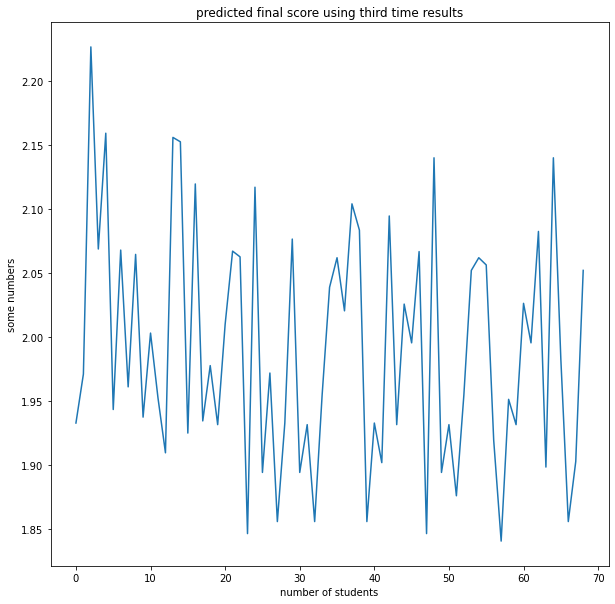

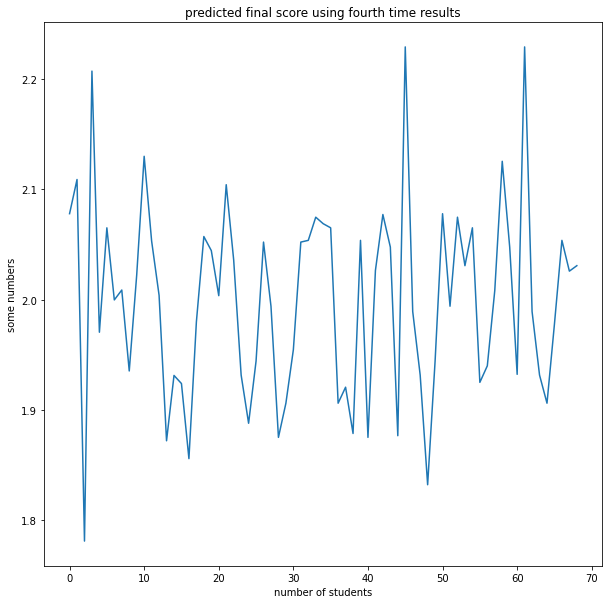

In [ ]:
new_feature7 = df1[['third time']]
new_feature8 = df1[['fourth time']]
new_pred7 = clf.predict(new_feature7)
new_pred8 = clf.predict(new_feature8)
#print(new_pred)

#plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(new_pred3)
plt.xlabel('number of students')
plt.ylabel('some numbers')
plt.title('predicted final score using third time results')


plt.figure(figsize=(10, 10))
plt.plot(new_pred4)
plt.xlabel('number of students')
plt.ylabel('some numbers')
plt.title('predicted final score using fourth time results')


plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

features = ['first time', 'second time']

X = final_dataset.loc[:, features].values
y = final_dataset['label']


X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)

# Create linear regression object
nbc = GaussianNB()

# Train the model using the training sets
nbc.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = nbc.predict(X_test)

%time
from sklearn.metrics import classification_report
y_pred = nbc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))




CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.53 µs
accuracy 0.6428571428571429
              precision    recall  f1-score   support

           1       1.00      0.44      0.62         9
           2       0.50      1.00      0.67         5

    accuracy                           0.64        14
   macro avg       0.75      0.72      0.64        14
weighted avg       0.82      0.64      0.63        14



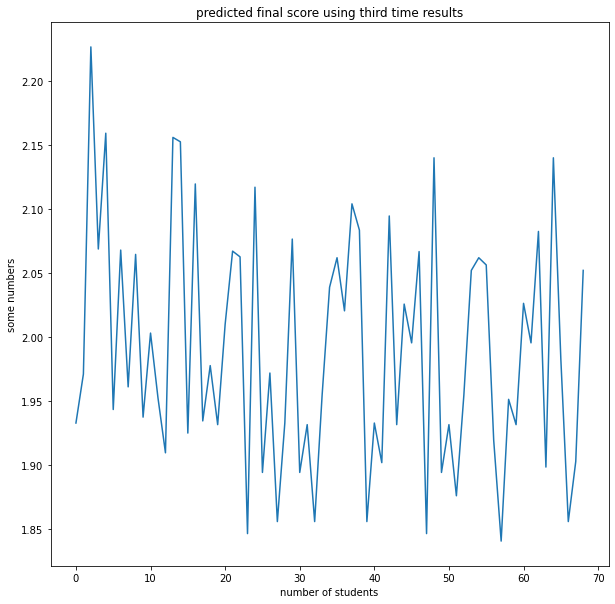

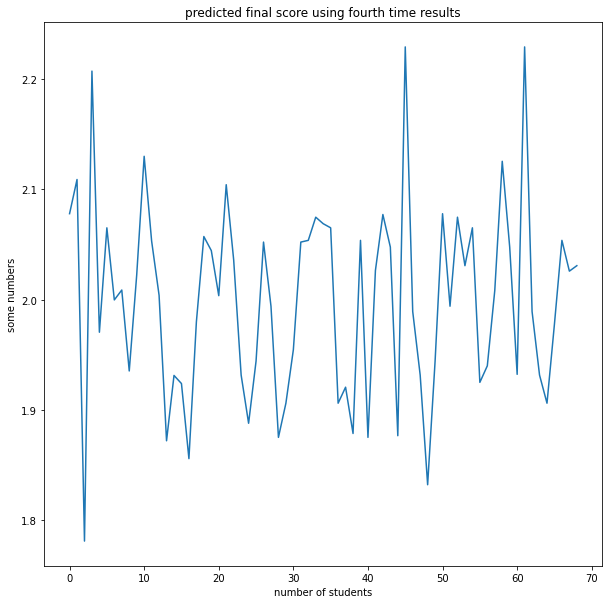

In [ ]:
new_feature9 = df1[['third time']]
new_feature10 = df1[['fourth time']]
new_pred9 = nbc.predict(new_feature9)
new_pred10 = nbc.predict(new_feature10)
#print(new_pred)

#plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(new_pred3)
plt.xlabel('number of students')
plt.ylabel('some numbers')
plt.title('predicted final score using third time results')


plt.figure(figsize=(10, 10))
plt.plot(new_pred4)
plt.xlabel('number of students')
plt.ylabel('some numbers')
plt.title('predicted final score using fourth time results')


plt.show()

In [31]:
#lets create another pivot table with SI and Code
df2 = df.pivot_table('Scores', ['SI','Sub-Programs', 'Code'], 'Level ').reset_index()
#fill any null values with the 0
df2 = df2.fillna(0)
df2

Level,SI,Sub-Programs,Code,first time,fourth time,second time,third time
0,RA01,Accounting Information,5555.0,2.13667,0.00000,0.00000,0.00000
1,RA01,Creative video,8001.0,0.00000,0.00000,0.00000,4.00000
2,RA01,Design for Entrepreneur,5557.0,0.00000,0.00000,0.00000,0.00000
3,RA01,Dissertation-1,8018.0,0.00000,2.83333,0.00000,0.00000
4,RA01,Dissertation-2,8019.0,0.00000,3.22333,0.00000,0.00000
...,...,...,...,...,...,...,...
1722,RA70,digital media,8002.0,0.00000,0.00000,0.00000,1.83333
1723,RA70,graphic design,8006.0,0.00000,0.00000,0.00000,4.00000
1724,RA70,green energy,2222.0,0.00000,0.00000,2.93667,0.00000
1725,RA70,happiness science,4444.0,0.00000,0.00000,3.43333,0.00000


array(['Business', 'Disertation', 'Electives - Arts and Music',
       'Electives - Management', 'Media', 'Personal Development',
       'Philosophy', 'Social Sciences', 'Viva', 'Computer Science',
       'Electives - Business Domain', 'Electives - Computer Domain',
       'Humanities', 'Mathematics', 'Programming', 'Science',
       'Electives - Finance Domain', 'Engineering', 'Acting Modeling',
       'Fashion'], dtype=object)

In [32]:
#now create a new column called final_socre_sub to store the mean values of first time, second time, third time and the fourth time
df2['final_score_sub'] = df2[['first time', 'second time', 'third time', 'fourth time']].mean(axis=1)
df2

Level,SI,Sub-Programs,Code,first time,fourth time,second time,third time,final_score_sub
0,RA01,Accounting Information,5555.0,2.13667,0.00000,0.00000,0.00000,0.534168
1,RA01,Creative video,8001.0,0.00000,0.00000,0.00000,4.00000,1.000000
2,RA01,Design for Entrepreneur,5557.0,0.00000,0.00000,0.00000,0.00000,0.000000
3,RA01,Dissertation-1,8018.0,0.00000,2.83333,0.00000,0.00000,0.708333
4,RA01,Dissertation-2,8019.0,0.00000,3.22333,0.00000,0.00000,0.805832
...,...,...,...,...,...,...,...,...
1722,RA70,digital media,8002.0,0.00000,0.00000,0.00000,1.83333,0.458332
1723,RA70,graphic design,8006.0,0.00000,0.00000,0.00000,4.00000,1.000000
1724,RA70,green energy,2222.0,0.00000,0.00000,2.93667,0.00000,0.734167
1725,RA70,happiness science,4444.0,0.00000,0.00000,3.43333,0.00000,0.858333


In [33]:
#lets merge df2 with df1 SI and final_score
dataset_final = df2.merge(df1[[ 'SI','final_score']], on='SI', how='left')


In [ ]:
#create machine learning model to predict the subject code
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


features = ['first time', 'second time', 'final_score_sub', 'final_score']

X = dataset_final.loc[:, features].values
y = dataset_final['Code']


X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [ -503.46553531 -1181.55491755  1738.10971457  -428.29279824]
Mean squared error: 1741116.55
Coefficient of determination: 0.43


In [ ]:
# lets find the cross validation
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

## Define variables for the for loop

kf = KFold(n_splits=10)
RMSE_sum=0
RMSE_length=10
features = ['first time', 'second time', 'final_score_sub', 'final_score']

X = dataset_final.loc[:, features].values
y = dataset_final['Code']

for loop_number, (train, test) in enumerate(kf.split(X)):

    ## Get Training Matrix and Vector

    training_X_array = X[train]
    training_y_array = y[train]

    ## Get Testing Matrix Values

    X_test_array = X[test]
    y_actual_values = y[test]

    ## Fit the Linear Regression Model

    lr_model = LinearRegression().fit(training_X_array, training_y_array)
#svr = SVR(kernel = 'rbf')
    ## Compute the predictions for the test data

    prediction = lr_model.predict(X_test_array)      
    prediction = np.array(prediction)   

    ## Calculate the RMSE

    RMSE_cross_fold = sqrt(mse(prediction, y_actual_values))

    ## Add each RMSE_cross_fold value to the sum

    RMSE_sum=RMSE_cross_fold+RMSE_sum

## Calculate the average and print    

RMSE_cross_fold_avg=RMSE_sum/RMSE_length

print('The Mean RMSE across all folds is',RMSE_cross_fold_avg)

The Mean RMSE across all folds is 1331.6325263356082


In [ ]:
#lest create a support vector regression machine learning model to get the output
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
#split feature set from the data frame
features = ['first time', 'second time', 'final_score_sub', 'final_score']
#set above columns as the feature
X = dataset_final.loc[:, features].values
#set final_score column as the laber
y = dataset_final['Code']


#add train_test_split to split train and test data
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)

# Create linear regression object
svr = SVR(kernel = 'rbf')

# Train the model using the training sets
svr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)



print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot output

Mean squared error: 1741116.55
Coefficient of determination: 0.43


In [ ]:
new_input = [[1.12309797, 1.41131072,0.652500, 2.044]]

new_pred = svr.predict(new_input)
print(new_pred)

In [34]:
dataset_final

Level,SI,Sub-Programs,Code,first time,fourth time,second time,third time,final_score_sub,final_score
0,RA01,Accounting Information,5555.0,2.13667,0.00000,0.00000,0.00000,0.534168,2.044583
1,RA01,Creative video,8001.0,0.00000,0.00000,0.00000,4.00000,1.000000,2.044583
2,RA01,Design for Entrepreneur,5557.0,0.00000,0.00000,0.00000,0.00000,0.000000,2.044583
3,RA01,Dissertation-1,8018.0,0.00000,2.83333,0.00000,0.00000,0.708333,2.044583
4,RA01,Dissertation-2,8019.0,0.00000,3.22333,0.00000,0.00000,0.805832,2.044583
...,...,...,...,...,...,...,...,...,...
1722,RA70,digital media,8002.0,0.00000,0.00000,0.00000,1.83333,0.458332,1.929166
1723,RA70,graphic design,8006.0,0.00000,0.00000,0.00000,4.00000,1.000000,1.929166
1724,RA70,green energy,2222.0,0.00000,0.00000,2.93667,0.00000,0.734167,1.929166
1725,RA70,happiness science,4444.0,0.00000,0.00000,3.43333,0.00000,0.858333,1.929166


In [40]:
dataset_final = dataset_final.groupby(['Code', 'Sub-Programs']).mean()
dataset_final

,Level,first time,fourth time,second time,third time,final_score_sub,final_score
Code,Sub-Programs,,,,,,
2221.0,Global warming solutions,4.0,0.00000,4.00000,0.0,1.570834,2.295479
2222.0,green energy,0.0,0.00000,4.00000,0.0,1.000000,2.251944
2223.0,Agriculture,0.0,0.00000,3.93333,0.0,0.983333,2.295479
2224.0,Crop science,0.0,0.00000,4.00000,0.0,1.000000,2.295479
2225.0,biological science,0.0,0.00000,4.00000,0.0,1.000000,2.251944
...,...,...,...,...,...,...,...
8020.0,Elective-1,0.0,3.77667,0.00000,0.0,0.944168,2.295479
8021.0,Elective-2,0.0,4.00000,0.00000,0.0,1.000000,2.295479
8022.0,Elective-3,0.0,4.00000,0.00000,0.0,1.000000,2.459277


In [41]:
#lets merge the dataset_final with df to get the Sub-Programs names. it will make sense rather than going for the code number
dataset_final_to_plot = dataset_final.merge(df[[ 'Code','Sub-Programs']], on='Code', how='left')
dataset_final_to_plot

,Code,first time,fourth time,second time,third time,final_score_sub,final_score,Sub-Programs
0,2221.0,4.0,0.0,4.0,0.0,1.570834,2.295479,Global warming solutions
1,2221.0,4.0,0.0,4.0,0.0,1.570834,2.295479,Global warming solutions
2,2221.0,4.0,0.0,4.0,0.0,1.570834,2.295479,Global warming solutions
3,2221.0,4.0,0.0,4.0,0.0,1.570834,2.295479,Global warming solutions
4,2221.0,4.0,0.0,4.0,0.0,1.570834,2.295479,Global warming solutions
...,...,...,...,...,...,...,...,...
1906,8024.0,0.0,4.0,0.0,0.0,1.000000,2.611646,Elective-5
1907,8024.0,0.0,4.0,0.0,0.0,1.000000,2.611646,Elective-5
1908,8024.0,0.0,4.0,0.0,0.0,1.000000,2.611646,Elective-5
1909,8024.0,0.0,4.0,0.0,0.0,1.000000,2.611646,Elective-5


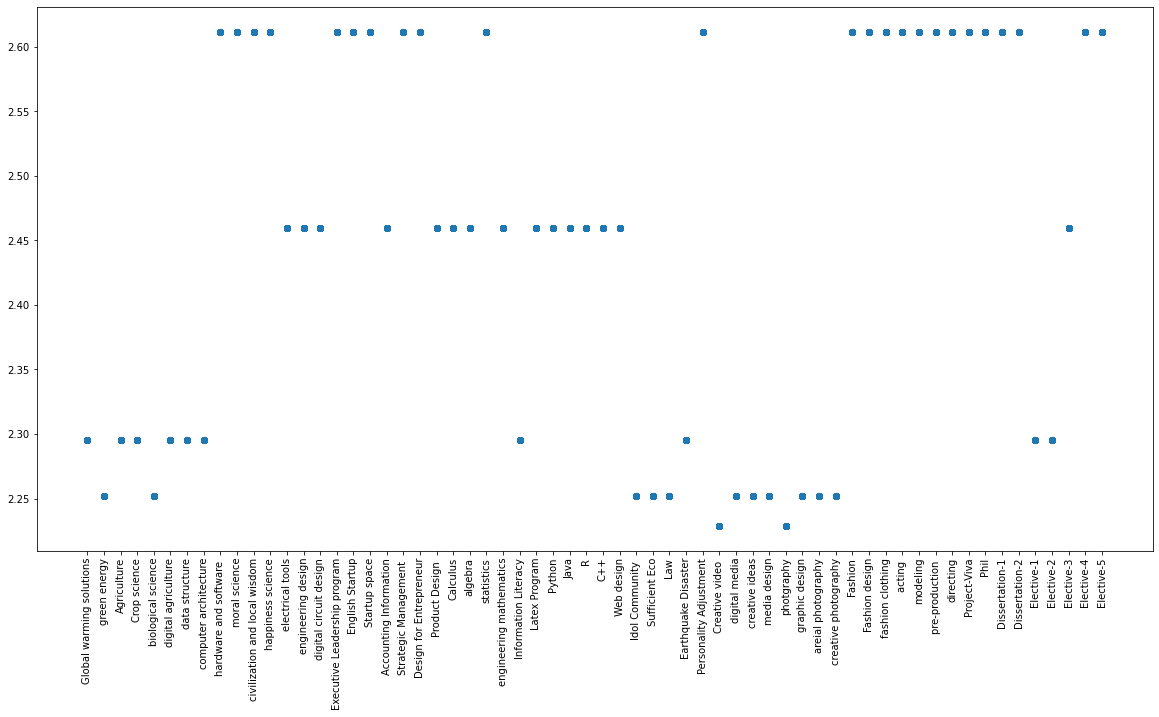

In [42]:

x = dataset_final_to_plot['Sub-Programs']
y = dataset_final_to_plot['final_score']
#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
plt.figure(figsize=(20,10))
plt.scatter(x, y,  alpha=0.5)
plt.xticks(rotation = 90)
plt.show()